In [1]:
# Make maps of ensembles of runs with the same IC for exf variables
# Plots ensemble mean and the anomalies in each run relative to the EM
# Option to select time averaging over all time points or just one year

In [71]:
# from matplotlib import pyplot as plt
import numpy as np
import Functions_data_analysis as fda
import Functions_load_output as flo
import Functions_plotting as fp
from Datasets import exp_set_dict_warm_order, exp_set_dict_wind_order

In [2]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [67]:
# Configure data and plotting options

exp_set = 'ic_1995'
# region = 'AS_long'
region = 'AS_near'
# region = 'full_model_domain'

# Times over which to average:
# 'all' selected times, 'season', or enter int for year avg
# time_mean = 'all'
time_mean = 1999 
month_start_idx = 47 #If you wantthe 5th yr of data, set month_start_idx=47 and n_months=12

# How many months of data to retrieve (from the first February of data)
n_months = 12

depth = -400

# Whether to plot in order of warm to cool or westerly to easterly
# runs = exp_set_dict_warm_order[exp_set]
runs = exp_set_dict_warm_order[exp_set]
print('Using the following experiments in this order:\n',runs)

Using the following experiments in this order:
 ['run_forc_erai_1982_rep_ic_1995', 'run_forc_erai_1984_rep_ic_1995', 'run_forc_erai_1989_rep_ic_1995', 'run_forc_erai_1992_rep_ic_1995', 'run_forc_erai_1994_rep_ic_1995', 'run_forc_erai_2003_rep_ic_1995', 'run_forc_erai_2009_rep_ic_1995', 'run_forc_erai_2011_rep_ic_1995', 'run_forc_erai_2015_rep_ic_1995', 'run_forc_erai_1991_rep_ic_1995']


In [68]:
# Load datasets as an ensemble 

prefix = prefix = 'state_3d_set2'
all_run_U_da = fda.get_ensemble_data_for_ic('U', runs, region, prefix, month_start_idx = month_start_idx,
                                            n_months = n_months, depth=depth) 
all_run_V_da = fda.get_ensemble_data_for_ic('V', runs, region, prefix, month_start_idx = month_start_idx,
                                            n_months = n_months, depth=depth) 

print('Data retrieved!')

Getting U data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(1999, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 12, 1, 0, 0, 0, 0, has_year_zero=True)]
(12, 254, 301)
lat shape, data lat shape: 254 254
lon shape, data lon shape: 300 300
1
(12, 254, 301)
2
(12, 254, 30

In [69]:
# Average data and ensemble mean over specified time or over all times

# Select times to average over
if time_mean == 'all':
    U_ens_data = all_run_U_da
    V_ens_data = all_run_V_da
    
    # Get averages
    U_em = U_ens_data.mean(dim = 'run')
    U_em_time_avg = U_em.mean(dim = 'time')
    V_em = V_ens_data.mean(dim = 'run')
    V_em_time_avg = V_em.mean(dim = 'time')
    
    
elif type(time_mean) == int:
    # Just use one year of winds since they should all be the same
    U_ens_data = all_run_U_da.sel(time = str(time_mean))
    V_ens_data = all_run_V_da.sel(time = str(time_mean))
    
    # Get averages
    U_em = U_ens_data.mean(dim = 'run')
    U_em_time_avg = U_em.mean(dim = 'time')
    V_em = V_ens_data.mean(dim = 'run')
    V_em_time_avg = V_em.mean(dim = 'time')    


U_time_avg = U_ens_data.mean(dim='time')  #(n_runs,n_lats,n_lons)
U_anom = U_time_avg - U_em_time_avg #shape (n_lats,n_lons)
V_time_avg = V_ens_data.mean(dim='time')
V_anom = V_time_avg - V_em_time_avg



In [7]:
U_em.shape

(12, 254, 300)

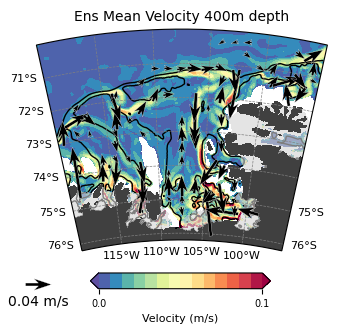

In [70]:
# Plot velocity magnitudes in colors and quivers
importlib.reload(fp)
# figname = 'Plots/Figure_wind_maps_annual_mean_ens_mean_'+region+'.png'
figname = None
if time_mean == 'all' or type(time_mean)==int:

    mag_em_levs = np.linspace(0,0.1,15)
    mag_em = (U_em_time_avg ** 2 + V_em_time_avg ** 2) ** 0.5

    # #mask small values and large values (Nan where condition is met)
    # mask = (mag_em < 0.01) | (mag_em > 0.1) # scale = .35
    mask = (mag_em < 0.01) | (mag_em > 0.1) # scale = 0.45
    U_em_masked = U_em_time_avg.where(~mask)
    V_em_masked = V_em_time_avg.where(~mask)

    # Plot ensemble mean
    fp.make_contour_map('Velocity', mag_em, mag_em_levs,'Spectral_r',region,quiv_vname='Velocity',
                        title='Ens Mean Velocity '+str(depth)[1:]+'m depth',save=figname,
                        data_x=U_em_masked, data_y=V_em_masked,vec_len=0.04)


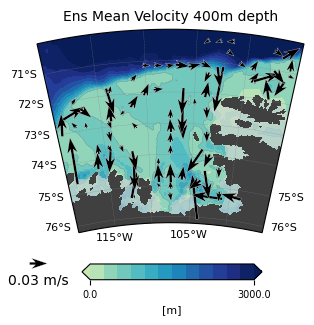

In [139]:
# Plot velocity quivers and bathymetry colors
importlib.reload(fp)
import matplotlib.pyplot as plt
from matplotlib import colors

# Get plot region bounds
lat1,lat2,lon1,lon2 = fda.plot_regions[region]
lon_mid = (lon1+lon2)/2

# get bathymtery and ice ds
land_ice_ds = flo.get_bathymetry_and_troughs()
lons_og, lats_og = land_ice_ds.lon, land_ice_ds.lat #for plotting trough indxs (need to finish setting up)
land_ice_ds = land_ice_ds.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2))

bathy_data = (land_ice_ds.bathy)
blevs = np.linspace(0,3000,13) 
cmap_bupu = plt.get_cmap('YlGnBu')#BuPu
b_cmap = colors.ListedColormap(cmap_bupu(np.linspace(0.25, 1, 256)))

fp.make_contour_map('Bathymetry', bathy_data, blevs,b_cmap,region,quiv_vname='Velocity',
                    title='Ens Mean Velocity '+str(depth)[1:]+'m depth',save=figname,
                    data_x=U_em_masked, data_y=V_em_masked,vec_len=0.03)
plt.savefig('Plots/Figure_bathymetry_map_with_quivers_no_locs.png',dpi=600)

In [34]:
# Calculate magnitudes in ensemble members

import xarray as xr

if time_mean == 'all' or type(time_mean)==int:
    
    mag_anom_levs = np.linspace(0,0.1,11)
    # calc mag for each run
    mag_ens_data = []
    for i in range(len(U_anom)):
        mag_i = (U_anom[i] ** 2 + V_anom[i] ** 2) ** 0.5
        mag_ens_data.append(mag_i)
    mag_ens_da = xr.concat(mag_ens_data,dim='run')

0


KeyError: 'Velocity'

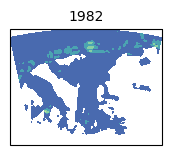

In [39]:
# Plot full ensemble maps with option to plot composites
importlib.reload(fp)

save = False
plot_composites = False

if plot_composites:
    if save:
        figname = 'Plots/Figure_velocity_mag_maps_with_composites_'+region+'.png'
        fp.make_ensemble_subplots_with_composites('Velocity', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Velocity Anomalies',\
                                                  data_x=U_anom, data_y=V_anom,save=figname)
    else:
        fp.make_ensemble_subplots_with_composites('Velocity', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Velocity Anomalies',\
                                                 data_x=U_anom, data_y=V_anom)

else:
    if save:
        figname = 'Plots/Figure_velocity_mag_maps_'+region+'.png'
        fp.make_ensemble_subplots('Velocity', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Velocity Anomalies',\
                               data_x=U_anom, data_y=V_anom,save=figname)
    else:
        fp.make_ensemble_subplots('Velocity', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Velocity Anomalies',\
                               data_x=U_anom, data_y=V_anom)



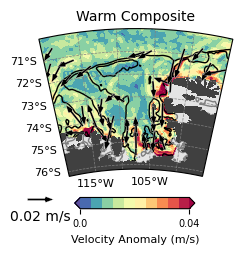

In [37]:
# Plot warm composite
warm_comp = mag_ens_da[0:4].mean(dim='run')
warm_comp_x = U_anom[0:4].mean(dim='run')
warm_comp_y = V_anom[0:4].mean(dim='run')

#mask small values
warm_comp_mag = (warm_comp_x ** 2 + warm_comp_y ** 2) ** 0.5
warm_comp_x_masked = warm_comp_x.where(warm_comp_mag > 0.01)
warm_comp_y_masked = warm_comp_y.where(warm_comp_mag > 0.01)

importlib.reload(fp)
fp.make_contour_map('Velocity_comp', warm_comp, np.linspace(0,0.04,11),'Spectral_r',region,
                        title='Warm Composite',
                        data_x=warm_comp_x_masked, data_y=warm_comp_y_masked,vec_len=0.02)

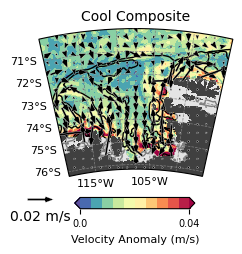

In [38]:
# Plot cool composite
cool_comp = mag_ens_da[4:8].mean(dim='run')
cool_comp_x = U_anom[4:8].mean(dim='run')
cool_comp_y = V_anom[4:8].mean(dim='run')

#mask small values
cool_comp_mag = (cool_comp_x ** 2 + cool_comp_y ** 2) ** 0.5
cool_comp_x_masked = cool_comp_x.where(cool_comp_mag > 0.01)
cool_comp_y_masked = cool_comp_y.where(cool_comp_mag > 0.01)

fp.make_contour_map('Velocity_comp', cool_comp, np.linspace(0,0.04,11),'Spectral_r',region,
                        title='Cool Composite',
                        data_x=cool_comp_x, data_y=cool_comp_y,vec_len=0.02)

In [58]:
np.max(cool_comp.values.flatten())

1.414877104904118

In [14]:
mag_ens_da.shape

(10, 254, 300)

In [19]:
# Broken from here.....
# Plot U ensemble mean (

if time_mean == 'all' or type(time_mean)==int:

    # Set up contour levels for EM and full ensemble plots
    uwind_em_levs = np.linspace(-5,5,17)
    uwind_anom_levs = np.linspace(-3,3,17)

    # Plot ensemble mean
    fp.make_contour_map('uwind', uwind_time_avg_mean, uwind_em_levs, 'PuOr_r',region,title='Ensemble mean '+ic_str,save=None)

    # Uncomment to save
    figname = 'Plots/Figure_uwind_EM_map_ic_'+ic_str+'.png'
    # fp.make_ensemble_mean_plot('uwind', uwind_time_avg_mean, uwind_em_levs, 'PuOr_r',region,save=figname)


NameError: name 'uwind_time_avg_mean' is not defined

In [53]:
# Plot uwind all members

if time_mean == 'all' or type(time_mean)==int:
    fp.make_ensemble_subplots('uwind', uwind_time_avg_mean, uwind_ens_data, uwind_em_levs, uwind_anom_levs, 'PuOr_r',region,save=None)

    figname = 'Plots/Figure_uwind_maps_ic_'+ic_str+'.png'
    # fp.make_ensemble_subplots('uwind', uwind_time_avg_mean, uwind_ens_data,uwind_em_levs, uwind_anom_levs, 'PuOr_r',region,save=figname)
    
    # Plot V em

    vwind_em_levs = np.linspace(-3,3,17)
    vwind_anom_levs = np.linspace(-0.8,0.8,17)

    # Plot without saving
    fp.make_contour_map('vwind', vwind_time_avg_mean,  vwind_em_levs, 'PiYG_r',region,title='Ensemble mean '+ic_str,save=None)

    # Uncomment to save
    figname = 'Plots/Figure_vwind_EM_map_ic_'+ic_str+'.png'
    # fp.make_ensemble_mean_plot('vwind', vwind_time_avg_mean,  vwind_em_levs, 'PiYG_r',region,save=figname)
    
    
    # Plot without saving
    fp.make_ensemble_subplots('vwind', vwind_time_avg_mean, vwind_ens_data,vwind_em_levs, vwind_anom_levs, 'PiYG_r',region,save=None)

    # Uncomment to save
    figname = 'Plots/Figure_vwind_maps_ic_'+ic_str+'.png'
    # fp.make_ensemble_subplots('vwind', vwind_time_avg_mean, vwind_ens_data,vwind_em_levs, vwind_anom_levs, 'PiYG_r',region,save=figname)



NameError: name 'uwind_em_levs' is not defined

In [17]:
if time_mean == 'season':

    yr1 = str(exp_set.split('_')[-1])
    yr2 = str(int(exp_set.split('_')[-1])+1)
    djf_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-12',yr2+'-02'))
    djf_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-12',yr2+'-02'))
    mam_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-03',yr1+'-05'))
    mam_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-03',yr1+'-05'))
    jja_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-06',yr1+'-08'))
    jja_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-06',yr1+'-08'))
    son_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-09',yr1+'-11'))
    son_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-09',yr1+'-11'))
    
season_ens_u_list = [djf_ens_u,mam_ens_u,jja_ens_u,son_ens_u]
season_ens_v_list = [djf_ens_v,mam_ens_v,jja_ens_v,son_ens_v]
seasons = ['DJF','MAM','JJA','SON']
season_mean_u = {} #ensemble mean dict
season_ens_u = {} #dict with data containing all runs (just populates above list as a dict)
season_mean_v = {}
season_ens_v = {}

for u,v,seas in zip(season_ens_u_list,season_ens_v_list,seasons):
    # Get averages
    uwind_mean = u.mean(dim = 'run')
    uwind_time_avg_mean = uwind_mean.mean(dim = 'time')
    season_mean_u[seas] = uwind_time_avg_mean
    season_ens_u[seas] = u
    
    vwind_mean = v.mean(dim = 'run')
    vwind_time_avg_mean = vwind_mean.mean(dim = 'time')
    season_mean_v[seas] = vwind_time_avg_mean
    season_ens_v[seas] = v

In [18]:
# Get ensemble mean of warmest runs
warm_run_idxs = [0,2,4,5]
warm_run_ens_u = season_ens_u['DJF'].isel(run=warm_run_idxs)
print('Using these runs as warm ensemble:')
print(warm_run_ens_u.run)
warm_run_mean_u = warm_run_ens_u.mean(dim='run')

Using these runs as warm ensemble:
<xarray.DataArray 'run' (run: 4)>
array(['run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_1982_rep_ic_2001',
       'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001'],
      dtype='<U30')
Coordinates:
  * run      (run) <U30 'run_forc_erai_2015_rep_ic_2001' ... 'run_forc_erai_1...


Using these runs as warm ensemble:
<xarray.DataArray 'run' (run: 4)>
array(['run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_1982_rep_ic_2001',
       'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001'],
      dtype='<U30')
Coordinates:
  * run      (run) <U30 'run_forc_erai_2015_rep_ic_2001' ... 'run_forc_erai_1...
0
1
2
3
4
5
6
7
8
9
<xarray.DataArray 'run' (run: 4)>
array(['run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_1982_rep_ic_2001',
       'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001'],
      dtype='<U30')
Coordinates:
  * run      (run) <U30 'run_forc_erai_2015_rep_ic_2001' ... 'run_forc_erai_1...


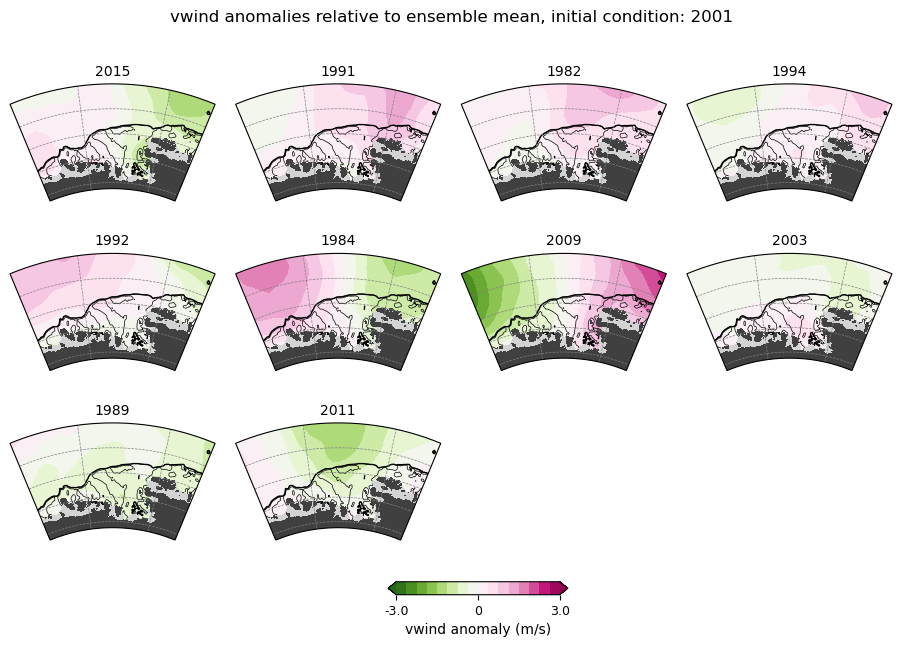

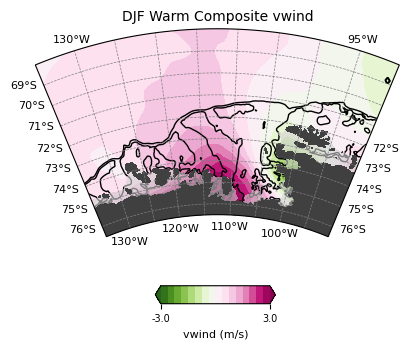

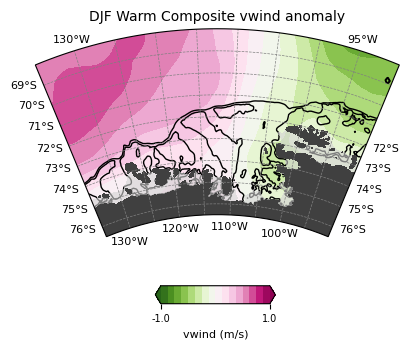

In [22]:
plot_season = 'DJF'

comp_levs = np.linspace(-3,3,17)
comp_anom_levs = np.linspace(-1,1,17)
ens_anom_levs = np.linspace(-3,3,17)

if time_mean == 'season':
    
    #U wind----------------------
    
    #plot u ensemble
    # fp.make_ensemble_subplots('uwind', season_mean_u[plot_season], season_ens_u[plot_season],comp_levs, anom_levs, 'PuOr_r',region,save=None)
    
    # Plot warm run composite U
    warm_run_idxs = [0,2,4,5]
    warm_run_ens_u = season_ens_u[plot_season].isel(run=warm_run_idxs)
    print('Using these runs as warm ensemble:')
    print(warm_run_ens_u.run)
    warm_run_mean_u = warm_run_ens_u.mean(dim='run')
    warm_run_mean_u = warm_run_mean_u.mean(dim='time')
    # fp.make_contour_map('uwind', warm_run_mean_u,  comp_levs, 'PuOr_r',region,title=plot_season+' Warm Composite uwind',save=None)

    # Plot warm run composite anomalies (warm U minus ensemble mean U)
    warm_run_mean_u_anom = warm_run_mean_u - season_mean_u[plot_season]
    # fp.make_contour_map('uwind', warm_run_mean_u_anom,  comp_anom_levs, 'PuOr_r',region,title=plot_season+' Warm Composite uwind anomaly',save=None)
    
    #V wind----------------------
    
    # Plot v ensemble
    fp.make_ensemble_subplots('vwind', season_mean_v[plot_season], season_ens_v[plot_season],ens_anom_levs, ens_anom_levs, 'PiYG_r',region,save=None)
    
    # Plot warm run composite V
    warm_run_ens_v = season_ens_v[plot_season].isel(run=warm_run_idxs)
    print(warm_run_ens_v.run)
    warm_run_mean_v = warm_run_ens_v.mean(dim='run')
    warm_run_mean_v = warm_run_mean_v.mean(dim='time')
    fp.make_contour_map('vwind', warm_run_mean_v,  comp_levs, 'PiYG_r',region,title=plot_season+' Warm Composite vwind',save=None)

    # Plot warm run composite anomalies (warm v minus ensemble mean v)
    warm_run_mean_v_anom = warm_run_mean_v - season_mean_v[plot_season]
    fp.make_contour_map('vwind', warm_run_mean_v_anom,  comp_anom_levs, 'PiYG_r',region,title=plot_season+' Warm Composite vwind anomaly',save=None)
    

